# Project Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available. Key attributes of the database The database includes the following indicators:

•

• country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

• country_long (text): longer form of the country designation

• name (text): name or title of the power plant, generally in Romanized form

• gppd_idnr (text): 10 or 12 character identifier for the power plant

• capacity_mw (number): electrical generating capacity in megawatts

• latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

• longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

• primary_fuel (text): energy source used in primary electricity generation or export

• other_fuel1 (text): energy source used in electricity generation or export

• other_fuel2 (text): energy source used in electricity generation or export

• other_fuel3 (text): energy source used in electricity generation or export

• commissioning_year (number): year of plant operation, weighted by unit-capacity when data is available

• owner (text): majority shareholder of the power plant, generally in Romanized form

• source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

• url (text): web document corresponding to the source field

• geolocation_source (text): attribution for geolocation information

• wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

• year_of_capacity_data (number): year the capacity information was reported

• generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013

• generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014

• generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015

• generation_gwh_2016 (number): electricity generation in gigawatt-hours reported for the year 2016

• generation_gwh_2017 (number): electricity generation in gigawatt-hours reported for the year 2017

• generation_gwh_2018 (number): electricity generation in gigawatt-hours reported for the year 2018

• generation_gwh_2019 (number): electricity generation in gigawatt-hours reported for the year 2019

• generation_data_source (text): attribution for the reported generation information

• estimated_generation_gwh_2013 (number): estimated electricity generation in gigawatt-hours for the year 2013

• estimated_generation_gwh_2014 (number): estimated electricity generation in gigawatt-hours for the year 2014

• estimated_generation_gwh_2015 (number): estimated electricity generation in gigawatt-hours for the year 2015

• estimated_generation_gwh_2016 (number): estimated electricity generation in gigawatt-hours for the year 2016

• estimated_generation_gwh_2017 (number): estimated electricity generation in gigawatt-hours for the year 2017

• 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

• estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014

• estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015

• estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016

• estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

Dataset Link- • https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import  warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')


In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [6]:
df.shape

(907, 27)

There are total of 907 rows and 27 columns n the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

As we can see that there are null values present in the dataset.

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There is a total of 907 rows in the dataset and some columns have more than 50% of the data(454) present as null values.
It will be better to remove the columns which will have more than 50% of values as null values.

In [9]:
df=df.drop(columns=['estimated_generation_gwh','generation_data_source','generation_gwh_2019','generation_gwh_2018','generation_gwh_2017','generation_gwh_2016','generation_gwh_2015','generation_gwh_2014','generation_gwh_2013','wepp_id','owner','other_fuel3','other_fuel2','other_fuel1'])

In [10]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,2016.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN


Now there are total of 907 rows and 13 columns.

In [12]:
df.dtypes

country                   object
country_long              object
name                      object
gppd_idnr                 object
capacity_mw              float64
latitude                 float64
longitude                float64
primary_fuel              object
commissioning_year       float64
source                    object
url                       object
geolocation_source        object
year_of_capacity_data    float64
dtype: object

In [14]:
df.duplicated().sum()

0

There are no duplicated values present in the dataset.

In [15]:
df.nunique()

country                    1
country_long               1
name                     907
gppd_idnr                907
capacity_mw              361
latitude                 836
longitude                827
primary_fuel               8
commissioning_year        73
source                   191
url                      304
geolocation_source         3
year_of_capacity_data      1
dtype: int64

In [16]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0


The columns 'country','country_long' and 'year_of_capacity_data' have only one type of data which will not help in building the model.

The columns 'name','gppd_idnr' have all unique values so it will also not help in building the machine learning model.

The column 'url' provides the link only for the documents so it will also not be usefull for further use.

So, we will remove all these columns.

In [17]:
df.drop(columns=['country','country_long','year_of_capacity_data','name','gppd_idnr','url'],inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            861 non-null    float64
 2   longitude           861 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  527 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  888 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


Columns 'latitude','longitude','commissioning_year' and 'geolocation_source' have null values present in them, so we will fix it.

<AxesSubplot:>

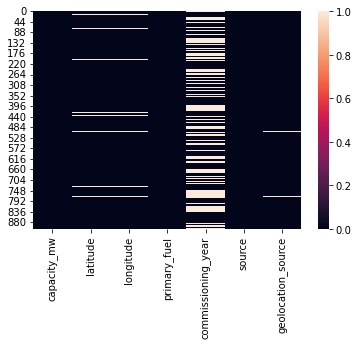

In [19]:
sns.heatmap(df.isna())

In [20]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].mean())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   capacity_mw         907 non-null    float64
 1   latitude            907 non-null    float64
 2   longitude           907 non-null    float64
 3   primary_fuel        907 non-null    object 
 4   commissioning_year  907 non-null    float64
 5   source              907 non-null    object 
 6   geolocation_source  907 non-null    object 
dtypes: float64(4), object(3)
memory usage: 49.7+ KB


Now there are no null values present in he dataset

In [22]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1998.728776
std,590.085456,6.079148,4.812291,13.158621
min,0.000000,8.168900,68.644700,1927.000000
25%,16.725000,17.072000,74.388900,1998.000000
50%,59.200000,21.281800,76.979200,2001.000000
75%,385.250000,25.176450,79.206100,2003.000000
max,4760.000000,34.649000,95.408000,2018.000000


We can notice that there is skewnesss present in the dataset as the mean and median(50%) of some columns have noticablee difference in them.

there may be outliers present in the dataset as there is a high difference in the 75% and max values of some columns.

In [23]:
df.describe(include='object')

,primary_fuel,source,geolocation_source
count,907,907,907
unique,8,191,3
top,Coal,Central Electricity Authority,WRI
freq,258,519,784


In [24]:
df.describe(include='all')

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
count,907.000000,907.000000,907.000000,907,907.000000,907,907
unique,NaN,NaN,NaN,8,NaN,191,3
top,NaN,NaN,NaN,Coal,NaN,Central Electricity Authority,WRI
freq,NaN,NaN,NaN,258,NaN,519,784
mean,326.223755,21.197918,77.464907,NaN,1998.728776,NaN,NaN
std,590.085456,6.079148,4.812291,NaN,13.158621,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,NaN
25%,16.725000,17.072000,74.388900,NaN,1998.000000,NaN,NaN
50%,59.200000,21.281800,76.979200,NaN,2001.000000,NaN,NaN
75%,385.250000,25.176450,79.206100,NaN,2003.000000,NaN,NaN


In [25]:
df.dtypes

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
commissioning_year    float64
source                 object
geolocation_source     object
dtype: object

In [26]:
c=[]
n=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        c.append(i)
    else:
        n.append(i)

In [27]:
c

['primary_fuel', 'source', 'geolocation_source']

In [28]:
n

['capacity_mw', 'latitude', 'longitude', 'commissioning_year']

# Data Visualisation.

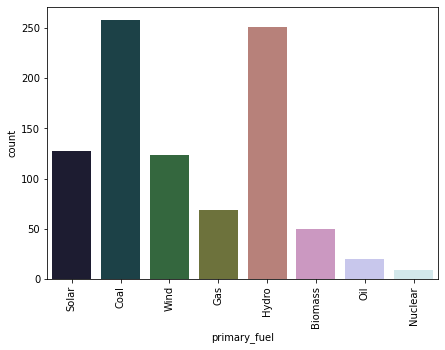

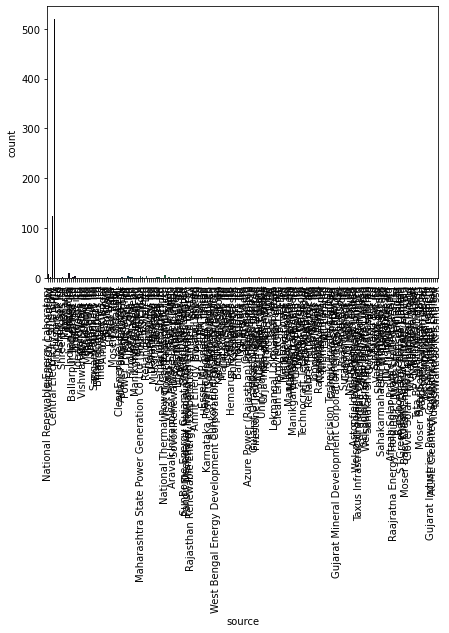

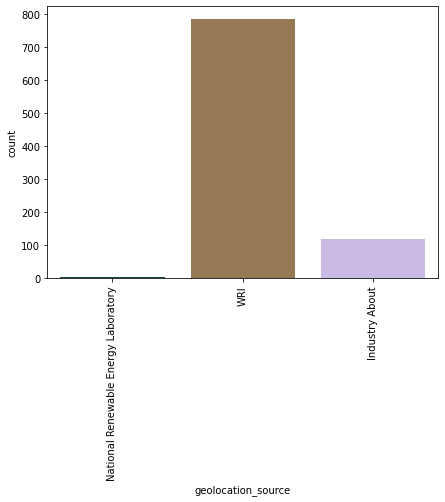

In [32]:
for i in c:
    plt.figure(figsize=(7,5))
    sns.countplot(df[i],palette='cubehelix')
    plt.xticks(rotation=90)
    plt.show()

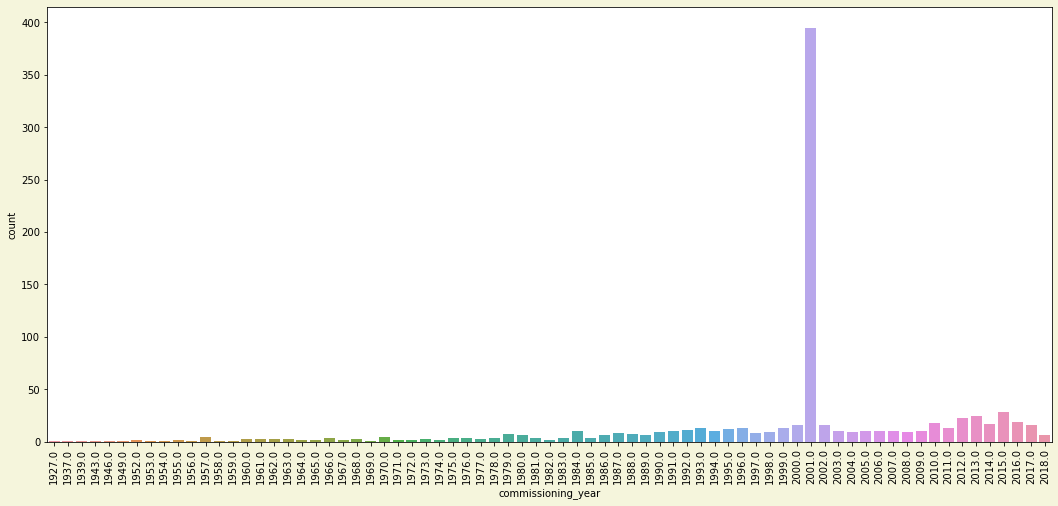

In [35]:
plt.figure(figsize=(18,8),facecolor='beige')
sns.countplot(df['commissioning_year'])
plt.xticks(rotation=90)
plt.show()

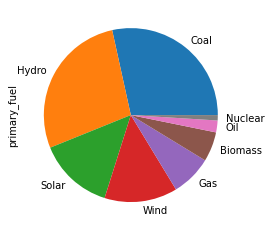

In [37]:
df['primary_fuel'].value_counts().plot.pie()
plt.show()

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

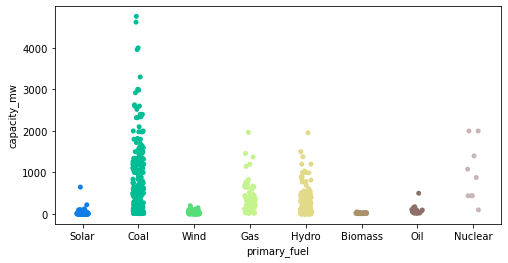

In [38]:
plt.figure(figsize=(8,4))
sns.stripplot(x = "primary_fuel", y = "capacity_mw", data = df,palette='terrain')

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

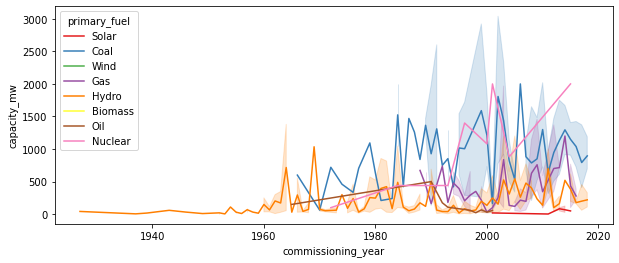

In [39]:
plt.figure(figsize=(10,4))
sns.lineplot(x = "commissioning_year", y = "capacity_mw", data = df,hue='primary_fuel',palette='Set1')

##### OBSERVATIONS


1) Coal is being used the most as primary fuel

2) WRI is the maximum in the geolocation_source.

3) In the column 'commissioning_year', 2001 holds the most amount of data.

4) Coal is being  used the most and boimass is neing used the least.

5) Hydro is being used for the longest period of time aas primary fuel and solar is the latest source of fuel.

# Encoding.

In [40]:
n

['capacity_mw', 'latitude', 'longitude', 'commissioning_year']

In [41]:
c

['primary_fuel', 'source', 'geolocation_source']

Primary fuel is our target variable

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])

In [43]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['source']=le.fit_transform(df['source'])
df['geolocation_source']=le.fit_transform(df['geolocation_source'])

In [44]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2001.0,174,2
2,39.2,21.9038,69.3732,7,2001.0,21,2
3,135.0,23.8712,91.3602,2,2004.0,22,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2


<AxesSubplot:>

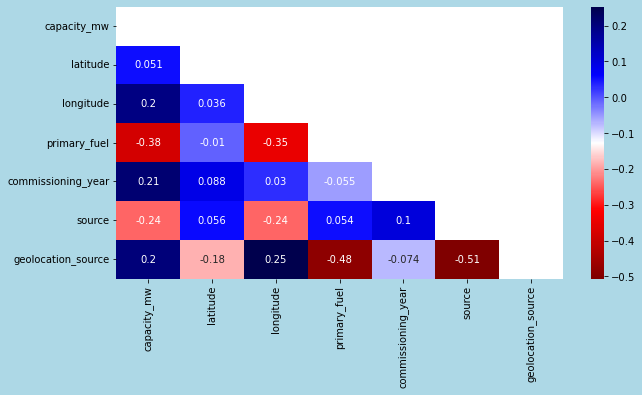

In [46]:
plt.figure(figsize=(10,5),facecolor='lightblue')
sns.heatmap(df.corr(),annot=True,mask=np.triu(df.corr()),cmap='seismic_r')

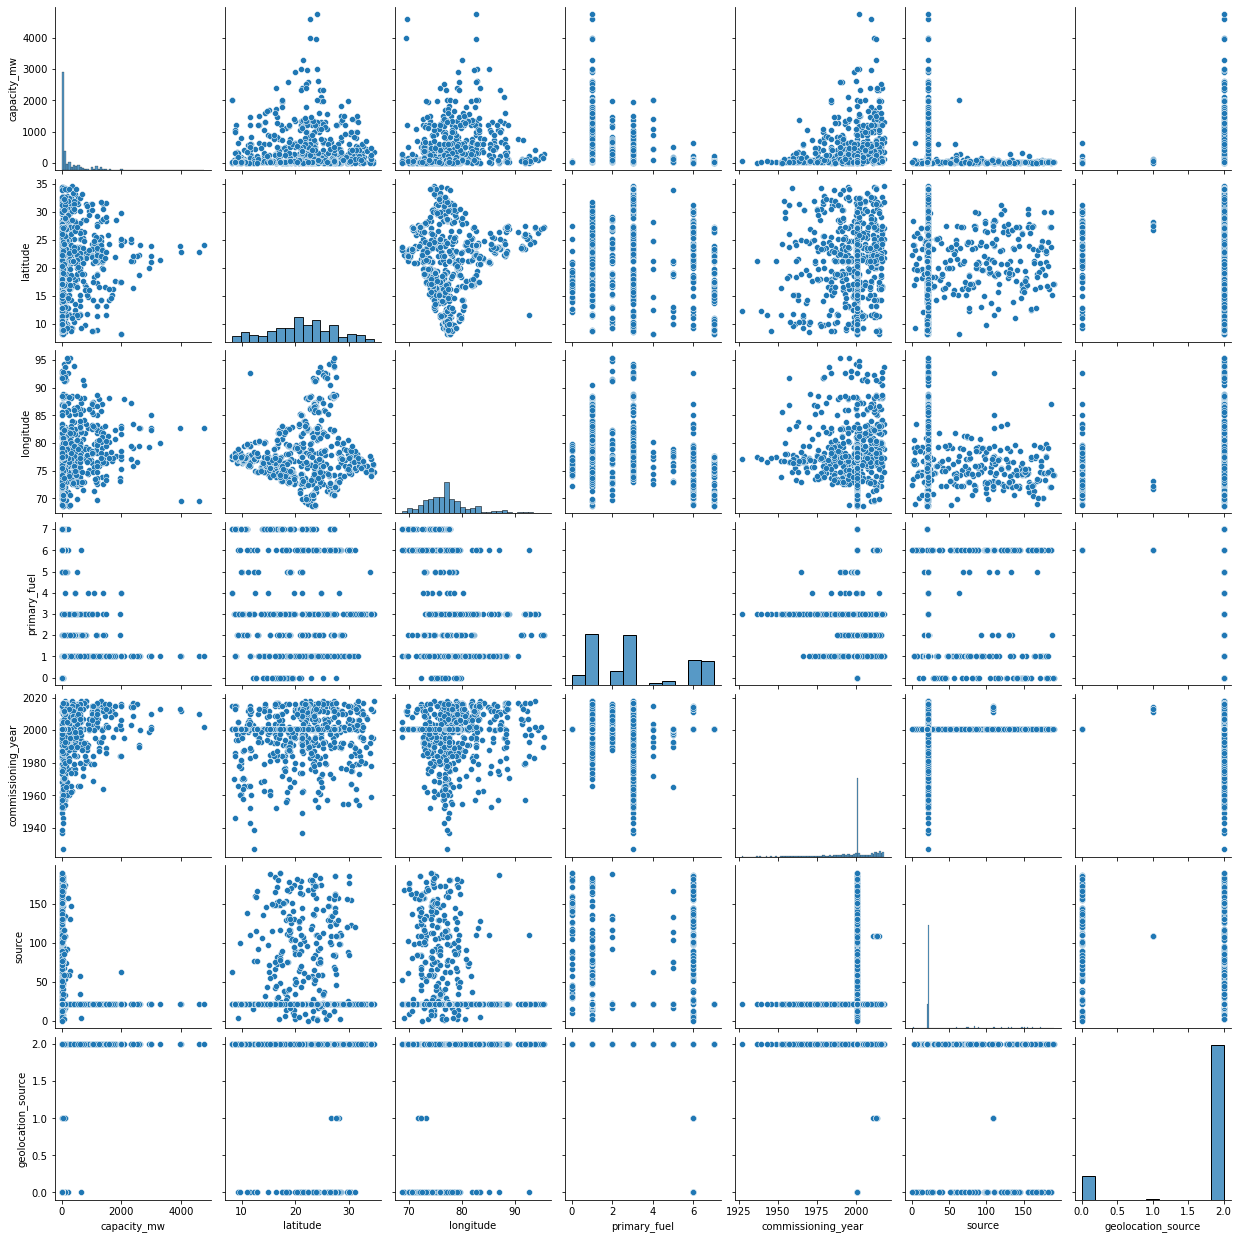

In [48]:
sns.pairplot(df)

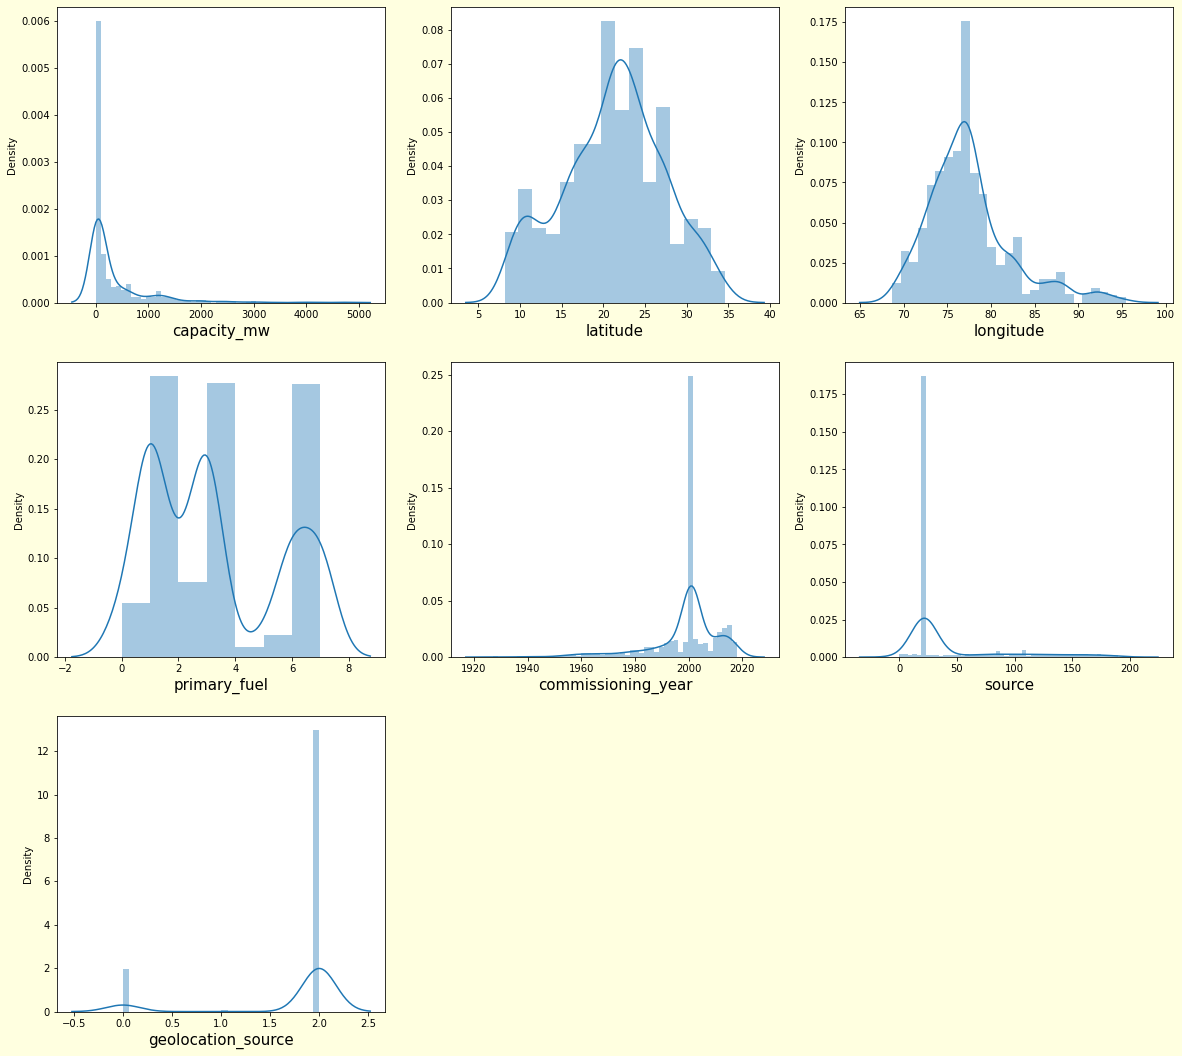

In [49]:
plt.figure(figsize=(20,25),facecolor='lightyellow')
pltno=1

for c in df:
    if pltno<=7:
        ax=plt.subplot(4,3,pltno)
        sns.distplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

There is some skewness present in the dataset.

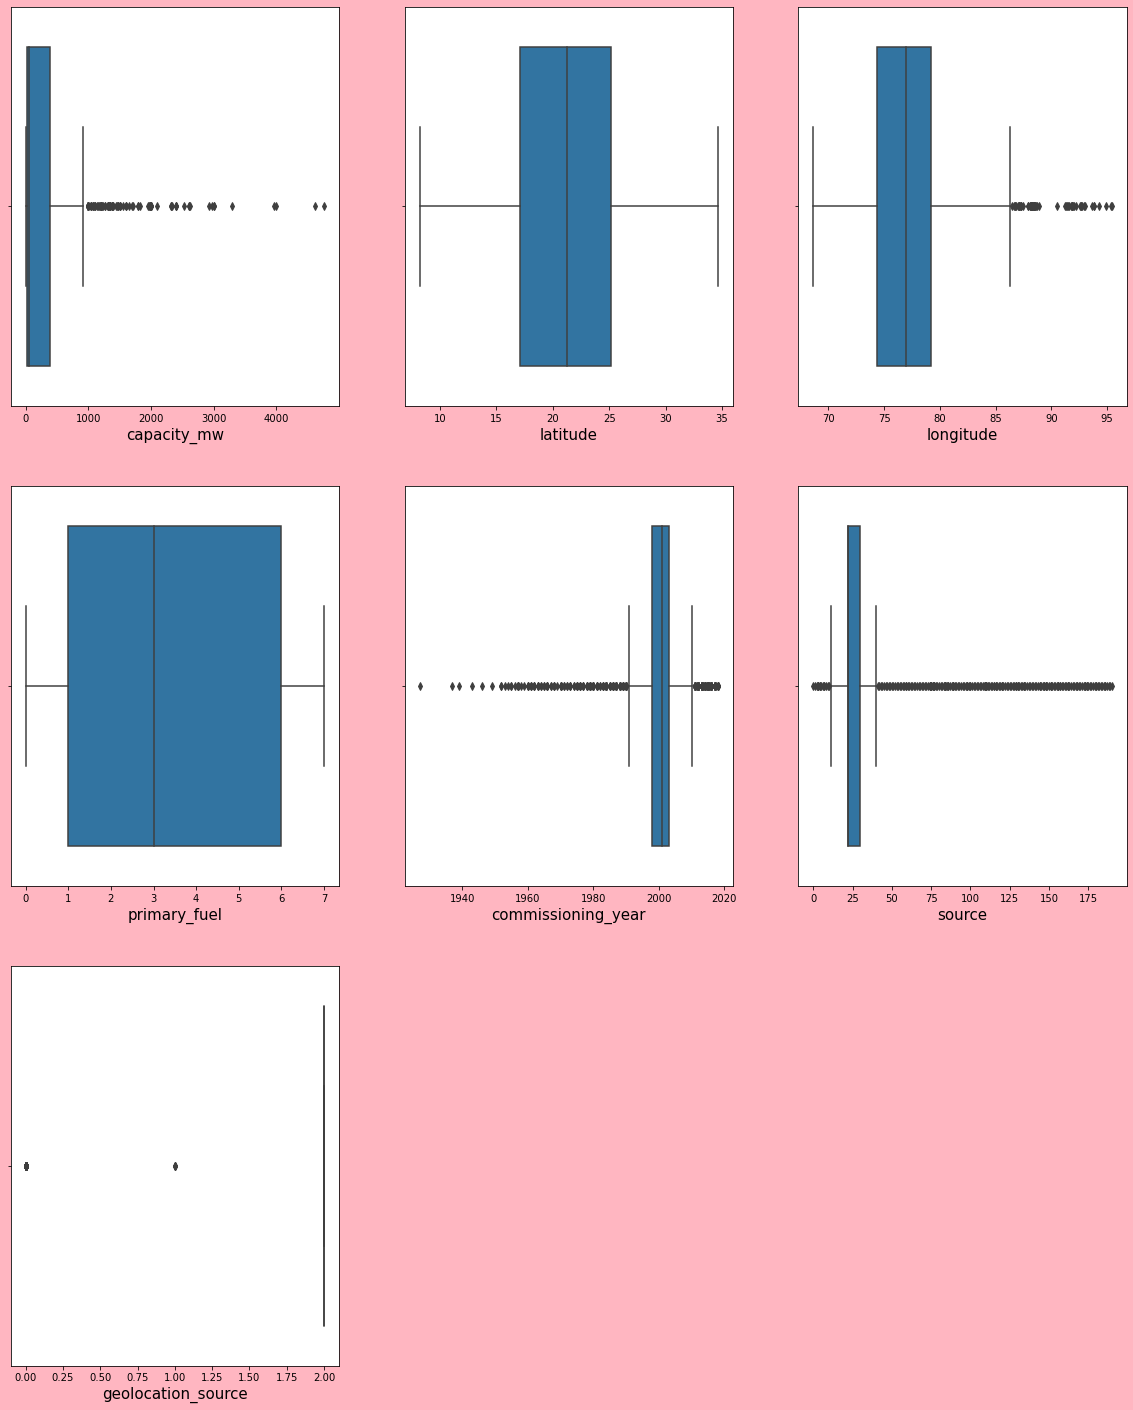

In [50]:
plt.figure(figsize=(20,25),facecolor='lightpink')
pltno=1

for c in df:
    if pltno<=7:
        ax=plt.subplot(3,3,pltno)
        sns.boxplot(df[c])
        plt.xlabel(c,fontsize=15)
        
    pltno+=1

There areoutliers present in the dataset.

# Removing outliers.

In [51]:
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df))

z.shape

(907, 7)

In [52]:
threshold=3
print(np.where(z>3))

(array([ 15,  71,  80, 143, 147, 179, 183, 191, 209, 219, 222, 244, 299,
       308, 321, 323, 333, 340, 342, 345, 360, 363, 364, 371, 375, 416,
       427, 444, 454, 478, 482, 484, 493, 494, 499, 519, 538, 541, 546,
       573, 577, 583, 592, 601, 621, 638, 648, 657, 661, 669, 689, 695,
       706, 709, 726, 728, 767, 786, 788, 807, 808, 818, 832, 847, 848,
       870, 871, 879, 880, 895, 900], dtype=int64), array([0, 5, 5, 0, 0, 2, 2, 5, 0, 4, 4, 2, 5, 0, 5, 2, 2, 2, 4, 5, 2, 0,
       0, 4, 0, 2, 2, 4, 4, 4, 0, 4, 0, 0, 2, 2, 4, 4, 2, 4, 2, 4, 4, 4,
       4, 2, 0, 0, 5, 5, 5, 0, 4, 4, 0, 4, 0, 0, 0, 4, 0, 2, 5, 2, 4, 5,
       5, 5, 0, 5, 5], dtype=int64))


In [53]:
 df1=df[(z<3).all(axis=1)]
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109,1
1,98.0,24.7663,74.6090,1,2001.0,174,2
2,39.2,21.9038,69.3732,7,2001.0,21,2
3,135.0,23.8712,91.3602,2,2004.0,22,2
4,1800.0,21.9603,82.4091,1,2015.0,22,2
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2
903,3.0,12.8932,78.1654,6,2001.0,77,0
904,25.5,15.2758,75.5811,7,2001.0,21,2
905,80.0,24.3500,73.7477,1,2001.0,59,2


In [54]:
df.shape

(907, 7)

In [55]:
df1.shape

(836, 7)

In [57]:
# Data loss

(907-836)/907*100

7.82800441014333

##### There is a dataloss of 7.82% after removing the outliers.

In [58]:
df1.skew()

capacity_mw           1.963440
latitude             -0.117938
longitude             0.900725
primary_fuel          0.417210
commissioning_year   -1.264230
source                1.788418
geolocation_source   -2.108238
dtype: float64

In [59]:
df1['capacity_mw']=np.log1p(df1['capacity_mw'])
df1['longitude']=np.log1p(df1['longitude'])
df1['source']=np.log1p(df1['source'])
df1['commissioning_year']=np.log1p(df1['commissioning_year'])
df1['geolocation_source']=np.log1p(df1['geolocation_source'])

In [73]:
x=df1.drop(columns=['primary_fuel'])
y=df1['primary_fuel']

# Standard scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[-1.64025948,  1.15971952, -0.90560725,  1.01039438,  1.69848351,
        -0.67845996],
       [ 0.1844358 ,  0.60094453, -0.56807996,  0.1229832 ,  2.33536251,
         0.40021124],
       [-0.30758582,  0.13292797, -1.89437712,  0.1229832 , -0.5091513 ,
         0.40021124],
       ...,
       [-0.5350873 , -0.95074496, -0.33197679,  0.1229832 , -0.5091513 ,
         0.40021124],
       [ 0.0748835 ,  0.5328798 , -0.77982234,  0.1229832 ,  0.86705877,
         0.40021124],
       [-0.76161789, -1.82405978,  0.11995066,  0.1229832 , -0.5091513 ,
         0.40021124]])

In [75]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [76]:
xx

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.640259,1.159720,-0.905607,1.010394,1.698484,-0.678460
1,0.184436,0.600945,-0.568080,0.122983,2.335363,0.400211
2,-0.307586,0.132928,-1.894377,0.122983,-0.509151,0.400211
3,0.357788,0.454596,3.130489,0.389671,-0.448178,0.400211
4,1.768169,0.142166,1.246490,1.364124,-0.448178,0.400211
...,...,...,...,...,...,...
831,1.703905,-0.784123,0.091668,1.452447,-0.448178,0.400211
832,-1.567361,-1.340298,0.281412,0.122983,1.226939,-2.522461
833,-0.535087,-0.950745,-0.331977,0.122983,-0.509151,0.400211
834,0.074884,0.532880,-0.779822,0.122983,0.867059,0.400211


In [77]:
# Now we will check thee vif values

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns

In [79]:
vif

,Vif values,features
0,1.494092,capacity_mw
1,1.074511,latitude
2,1.172948,longitude
3,1.051851,commissioning_year
4,1.322540,source
5,1.572728,geolocation_source


All the vif values are under 10.

# Balance the data

In [80]:
y.value_counts()

1    234
3    220
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

In [81]:
from imblearn.over_sampling import SMOTE
smt= SMOTE(random_state=44)
train_x,train_y=smt.fit_resample(xx,y)
train_y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

# Model Building

In [82]:
#importing necessary libraries for model building

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [83]:
models=[LogisticRegression(),RandomForestClassifier(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

In [84]:
maxAccu=0
maxRS=0
lg=LogisticRegression()
for i in range(10,40):
    x_train,x_test,y_train,y_test=train_test_split(xx,y,random_state=i,test_size=.25)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy score is', maxAccu , 'on random state', maxRS)

Best Accuracy score is 0.7464114832535885 on random state 33


In [85]:
# the model gives best accuracy at random state 33

In [86]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,y,random_state=33,test_size=.25)


In [87]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [88]:
for m in models:
    m.fit(xtrain,ytrain)
    m.score(xtrain,ytrain)
    predm=m.predict(xtest)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(ytest,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(ytest,predm))
    print ('\n','Classification Report:','\n',classification_report(ytest,predm))
    cvs=cross_val_score(m,xx,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*****************************************************************************')

 For LogisticRegression()  Accuracy score is:  0.7464114832535885

 Confusion matrix: 
 [[ 7  0  0  1  0  0  0  3]
 [ 3 57  0  5  0  0  0  2]
 [ 1  8  0  2  0  0  0  1]
 [ 0 11  0 35  0  0  0  5]
 [ 0  2  0  0  0  0  0  0]
 [ 1  2  0  1  0  0  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  1  0  4  0  0  0 27]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.64      0.61        11
           1       0.70      0.85      0.77        67
           2       0.00      0.00      0.00        12
           3       0.73      0.69      0.71        51
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         4
           6       1.00      1.00      1.00        30
           7       0.71      0.84      0.77        32

    accuracy                           0.75       209
   macro avg       0.47      0.50      0.48       209
weighted avg       0.69      0.75      0.71       209

Cross Validation 

 as per the observation, RandomForest classifier is our best model
 
 so hyperparameter tuning will be done on that model

# Hyperparameter tuning

In [89]:
from sklearn.model_selection import GridSearchCV

In [91]:
rc=RandomForestClassifier()
param={'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
       'min_samples_leaf': [3, 4, 5],
      'criterion':['gini','entropy']}

gcs=GridSearchCV(rc,param,cv=7,scoring='accuracy')
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 3}

In [92]:
fmodel=RandomForestClassifier(max_features='auto',min_samples_leaf=3,criterion='gini',max_depth=15)

In [93]:
fmodel.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=15, min_samples_leaf=3)

In [94]:
pred=fmodel.predict(xtest)
acc=accuracy_score(ytest,pred)
print(acc*100)

83.73205741626795


In [95]:
#  the randomforest classifier gives the accuracy of 83.29%

# Saving the model

In [96]:
import joblib
joblib.dump(fmodel,'global_powerplant_primaryfuel')

['global_powerplant_primaryfuel']

# Loading the model

In [97]:
m = joblib.load("global_powerplant_primaryfuel")
print(m.predict(xtest))

[1 7 3 1 1 0 6 0 1 7 7 3 7 3 1 1 0 3 1 3 1 1 6 6 0 6 1 6 1 2 7 1 1 2 1 1 7
 6 1 1 7 1 7 3 7 3 3 1 2 7 3 2 1 3 6 6 6 7 1 1 3 1 2 1 7 3 0 6 3 6 7 1 0 3
 3 1 7 1 3 3 7 7 3 6 3 3 0 3 1 1 6 1 7 1 0 3 7 3 6 3 1 3 1 3 7 1 3 3 0 1 1
 1 6 7 1 6 3 7 1 2 5 3 6 6 1 1 3 3 2 7 3 3 6 1 6 1 1 6 0 3 1 6 0 1 1 7 1 1
 6 1 1 1 1 1 1 7 6 1 3 1 2 1 1 0 3 7 7 3 2 7 6 7 3 3 3 0 1 1 1 1 2 3 3 7 3
 6 0 2 1 1 6 1 1 1 6 6 1 7 3 1 3 1 7 6 3 3 7 3 1]


In [98]:
d=pd.DataFrame({'predicted values':pred,'actual values':ytest})

In [99]:
d

,predicted values,actual values
598,1,3
282,7,7
703,3,3
167,1,1
902,1,1
...,...,...
839,3,3
184,3,3
68,7,7
656,3,1


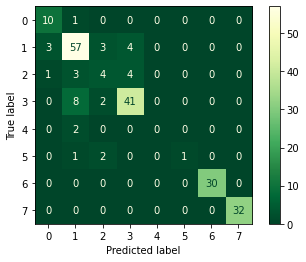

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(ytest, pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='YlGn_r')

# Now taking 'capacity_mw' as target variable.

In [101]:
y=df1['capacity_mw']
x=df1.drop(columns=['capacity_mw'])

In [102]:
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,28.1839,4.307313,6,7.606885,4.700480,0.693147
1,24.7663,4.325575,1,7.601902,5.164786,1.098612
2,21.9038,4.253813,7,7.601902,3.091042,1.098612
3,23.8712,4.525696,2,7.603399,3.135494,1.098612
4,21.9603,4.423757,1,7.608871,3.135494,1.098612
...,...,...,...,...,...,...
902,16.2949,4.361273,1,7.609367,3.135494,1.098612
903,12.8932,4.371539,6,7.601902,4.356709,0.000000
904,15.2758,4.338350,7,7.601902,3.091042,1.098612
905,24.3500,4.314118,1,7.601902,4.094345,1.098612


In [103]:
y

0      1.252763
1      4.595120
2      3.693867
3      4.912655
4      7.496097
         ...   
902    7.378384
903    1.386294
904    3.277145
905    4.394449
906    2.862201
Name: capacity_mw, Length: 836, dtype: float64

In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = sc.fit_transform(x)
scaled_x

array([[ 1.15971952, -0.90560725,  1.17297914,  1.01039438,  1.69848351,
        -0.67845996],
       [ 0.60094453, -0.56807996, -0.98600492,  0.1229832 ,  2.33536251,
         0.40021124],
       [ 0.13292797, -1.89437712,  1.60477595,  0.1229832 , -0.5091513 ,
         0.40021124],
       ...,
       [-0.95074496, -0.33197679,  1.60477595,  0.1229832 , -0.5091513 ,
         0.40021124],
       [ 0.5328798 , -0.77982234, -0.98600492,  0.1229832 ,  0.86705877,
         0.40021124],
       [-1.82405978,  0.11995066,  1.60477595,  0.1229832 , -0.5091513 ,
         0.40021124]])

In [105]:
xx=pd.DataFrame(scaled_x,columns=x.columns)

In [106]:
xx

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.159720,-0.905607,1.172979,1.010394,1.698484,-0.678460
1,0.600945,-0.568080,-0.986005,0.122983,2.335363,0.400211
2,0.132928,-1.894377,1.604776,0.122983,-0.509151,0.400211
3,0.454596,3.130489,-0.554208,0.389671,-0.448178,0.400211
4,0.142166,1.246490,-0.986005,1.364124,-0.448178,0.400211
...,...,...,...,...,...,...
831,-0.784123,0.091668,-0.986005,1.452447,-0.448178,0.400211
832,-1.340298,0.281412,1.172979,0.122983,1.226939,-2.522461
833,-0.950745,-0.331977,1.604776,0.122983,-0.509151,0.400211
834,0.532880,-0.779822,-0.986005,0.122983,0.867059,0.400211


In [107]:
# Checking vif values

vif=pd.DataFrame()
vif['Vif values']=[variance_inflation_factor(xx.values,i)
                    for i in range(len(xx.columns))]
vif["features"]=xx.columns
vif

,Vif values,features
0,1.064071,latitude
1,1.263959,longitude
2,1.569116,primary_fuel
3,1.027473,commissioning_year
4,1.389180,source
5,1.789340,geolocation_source


# Model building

In [108]:
# importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [109]:
models_reg=[LinearRegression(),SVR(),RandomForestRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),AdaBoostRegressor()]

In [112]:
maxAcc = 0
maxRS = 0

for i in range(1,70):
    xtrain,xtest,ytrain,ytest = train_test_split(xx,y,test_size = .25, random_state=i)
    lg = LinearRegression()
    lg.fit(xtrain,ytrain)
    pred = lg.predict(xtest)
    acc = r2_score(ytest,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.5225022856525341 on Random State: 6


In [113]:
xtrain,xtest,ytrain,ytest=train_test_split(xx,y,test_size=0.25,random_state=6)

In [114]:
for m in models_reg:
    m.fit(xtrain,ytrain)
    mpred=m.predict(xtest)
    print('\033[1m','For',m,'\033[0m')
    print("R2 score :",r2_score(ytest, mpred))
    print("Mean absolute error: ", mean_absolute_error(ytest,mpred))
    print("Mean squared error: ", mean_squared_error(ytest,mpred))
    cvs=cross_val_score(m,xx,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*****************************************************************************')

 For LinearRegression() 
R2 score : 0.5225022856525341
Mean absolute error:  1.0819449847306455
Mean squared error:  1.6728875048644318
Cross Validation Score= 0.4263132708929628 

*****************************************************************************
 For SVR() 
R2 score : 0.5919170527894776
Mean absolute error:  0.9380697496379946
Mean squared error:  1.429696609688824
Cross Validation Score= 0.5340651250322125 

*****************************************************************************
 For RandomForestRegressor() 
R2 score : 0.6360943560716529
Mean absolute error:  0.868627462728997
Mean squared error:  1.2749238088171966
Cross Validation Score= 0.6336142104608344 

*****************************************************************************
 For KNeighborsRegressor() 
R2 score : 0.5893735178288351
Mean absolute error:  0.9206081275410934
Mean squared error:  1.4386077473257013
Cross Validation Score= 0.5622995857582076 

*************************************************

Randomforest regressor is our best model.

# Hyperparameter tuning

In [115]:
r=RandomForestRegressor()
param = {'n_estimators':[50,60,70],'max_depth': [10,15,20],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}
gcs=GridSearchCV(r,param,cv=5)
gcs.fit(xtrain,ytrain)
gcs.best_params_


{'criterion': 'mae',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60}

In [116]:
fmodel1=RandomForestRegressor(max_features='sqrt',criterion='mae',min_samples_leaf=5,min_samples_split=10,max_depth=20,n_estimators=60)

In [117]:
fmodel1.fit(xtrain,ytrain)

RandomForestRegressor(criterion='mae', max_depth=20, max_features='sqrt',
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=60)

In [118]:
pred1=fmodel1.predict(xtest)
acc=r2_score(ytest,pred1)
print(acc*100)

66.61197466802393


In [119]:
# Model is now giving the accuraacy of 66.6%

# Best fit line

Text(0.5, 1.0, 'Best Fit Line')

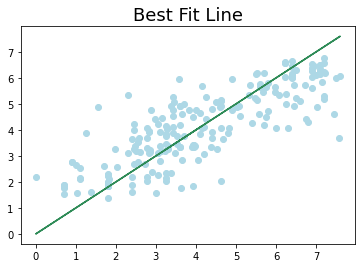

In [123]:
plt.scatter(x=ytest,y=pred1,color='lightblue')
plt.plot(ytest,ytest,color='seagreen')
plt.title('Best Fit Line',fontsize=18)

# Saving the model

In [124]:
import joblib
joblib.dump(fmodel1,'global_powerplant_capicity_mw')

['global_powerplant_capicity_mw']

# Loading thee model

In [125]:
p = joblib.load("global_powerplant_capicity_mw")
print(p.predict(xtest))

[3.1707279  4.04418016 4.07761086 3.34052816 3.36992999 4.92293762
 2.31553755 6.45833116 5.33363913 3.25054011 4.93804962 6.16391741
 5.7407071  3.86734918 1.62290037 3.65899723 5.47413783 5.96260106
 3.78061954 2.18537197 6.56322762 5.09117443 1.8436205  1.78444936
 6.24853442 3.87066021 2.10168489 4.92672177 2.28033028 3.70233313
 4.6066726  6.27753405 3.92843731 3.97637149 5.00560267 2.84494288
 4.43658721 4.62009906 4.06936341 2.09593508 2.77573671 3.76834657
 6.48845566 3.68878305 2.70568368 4.76034326 6.41743595 4.2047282
 4.24159839 2.75649981 3.41457588 2.36162637 3.41457588 3.10781323
 1.82914985 6.14043561 6.04436895 4.31083317 1.62479852 3.25022719
 3.23609397 4.75962002 1.36934348 6.19756094 1.56194217 4.05990194
 4.75717135 4.0638531  5.81896481 6.09503759 3.35835009 3.14648536
 3.16580137 4.00024797 6.06746944 5.25330034 4.1796651  6.55515671
 4.98041784 2.6357285  5.77096813 3.85354074 6.13734689 1.5796991
 3.17797148 5.72947927 3.31747338 3.10109057 2.03696035 4.657964

In [126]:
dd=pd.DataFrame({'predicted values':pred1,'actual values':ytest})

In [127]:
dd

,predicted values,actual values
255,3.170728,3.218876
491,4.044180,3.265759
198,4.077611,4.836282
269,3.340528,3.912023
361,3.369930,3.295837
...,...,...
253,6.016999,6.398595
732,2.554738,2.028148
400,1.895617,2.397895
458,5.636811,5.978886
